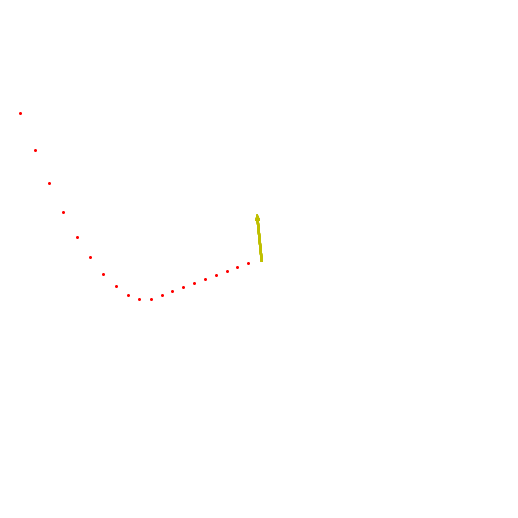

In [11]:
#  Particle accelerating under suddenly turned-on force

""" 
This program shows the paths of particles starting at the origin and travelling in a random direction. After 10 timesteps a force with a random 
magnitude turns on and the particle accelerates in the direction of the force. The force magnitude and direction is shown by an arrow centered at the origin.

Code translated from GW-BASIC provided in Exercise 1.1 of Stommel and Moore (1989)

author: Victoria McDonald
email: vmcd@atmos.washington.edu
website: https://github.com/torimcd/coriolis-sm

"""

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import random
%matplotlib inline

def rnd():
    '''
    This function returns a random number between 0 and 1

    '''
    rand = random.uniform(0,1)
    return rand

# Create new Figure and an Axes which fills it.
fig = plt.figure(figsize=(7, 7))
ax = fig.add_axes([0, 0, 1, 1], frameon=False)
ax.set_xlim(-100, 100), ax.set_xticks([])
ax.set_ylim(-100, 100), ax.set_yticks([])

# Create particle
particle = {}

force_scale_factor = 10
arrow_scale_factor = 10
trajectory_scale_factor = 10

# Initialize the particles at 0,0 with random velocity
particle['position'] = (0, 0)
particle['velocity'] = (trajectory_scale_factor*(rnd()-0.5), trajectory_scale_factor*(rnd()-0.5))
particle['force'] =  (0, 0)
particle['curve'] = (0, 0)

force_x_direction = force_scale_factor*(rnd()-0.5)
force_y_direction = force_scale_factor*(rnd()-0.5)

arrow_x = 1
arrow_y = -1
arrow_dx = arrow_scale_factor*force_x_direction
arrow_dy = arrow_scale_factor*force_y_direction

# Construct the scatter which we will update during animation
# as the raindrops develop.
pos, = ax.plot([], [], 'ro', ms=2)
#arrow = ax.arrow(arrow_x, arrow_y, arrow_dx, arrow_dy, color='y', width=0.05, shape='full', visible=True)

def update(frame):
    arrow = ax.arrow(arrow_x, arrow_y, arrow_dx, arrow_dy, color='y', width=0.5, shape='full', visible=True)
    if frame < 10:
        force_x = 0
        force_y = 0
        arrow.remove()
    else:
        force_x = force_x_direction
        force_y = force_y_direction

    particle['curve'] = (force_x, force_y)

    particle['velocity'] = (particle['curve'][0]+ particle['velocity'][0], particle['curve'][1] + particle['velocity'][1])

    particle['position'] = (particle['velocity'][0] + particle['position'][0], particle['velocity'][1] + particle['position'][1])


    pos.set_data(particle['position'][0], particle['position'][1])
    ax.plot(particle['position'][0], particle['position'][1], 'ro', ms=2)

    return pos

def init():
    pos.set_data([], [])
    return pos

# Construct the animation, using the update function as the animation director.
animation = FuncAnimation(fig, update, init_func=init, frames=20, interval=500, repeat=False, blit=False)

HTML(animation.to_html5_video())